In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df=pd.read_csv('forest_fire_dataset.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [28]:
df=df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [29]:
df.isnull().sum()

Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [30]:
df[df.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [31]:
df.drop(122,axis=0,inplace=True)

In [33]:
df[df.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [35]:
df.dropna(axis=0,inplace=True)

In [36]:
df=df.reset_index(drop=True)

In [37]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  244 non-null    object
 1    RH          244 non-null    object
 2    Ws          244 non-null    object
 3   Rain         244 non-null    object
 4   FFMC         244 non-null    object
 5   DMC          244 non-null    object
 6   DC           244 non-null    object
 7   ISI          244 non-null    object
 8   BUI          244 non-null    object
 9   FWI          244 non-null    object
 10  Classes      244 non-null    object
dtypes: object(11)
memory usage: 21.1+ KB


In [40]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')

In [44]:
df.columns=df.columns.str.strip()
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [46]:
df[['Temperature','RH','Ws']].astype(int)

ValueError: invalid literal for int() with base 10: 'Temperature'

In [47]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', 'Temperature', '38', '39', '40', '42'],
      dtype=object)

In [48]:
df[df['Temperature']=='Temperature']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [49]:
df.drop(122,axis=0,inplace=True)

In [50]:
df.reset_index(drop=True,inplace=True)

In [51]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)   

In [53]:
objects=[feature for feature in df.columns if df[feature].dtype=='O']

for feature in objects:
    if feature!='Classes':
        df[feature]=df[feature].astype(float)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 21.0+ KB


In [55]:
df.loc[:122,"Region"]=0
df.loc[123:,"Region"]=1

In [56]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [57]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [58]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [60]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x254801094f0>,
 [Text(-0.2189564657232264, 1.0779879712306597, '1'),
  Text(0.21895655996393085, -1.0779879520888727, '0')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6')])

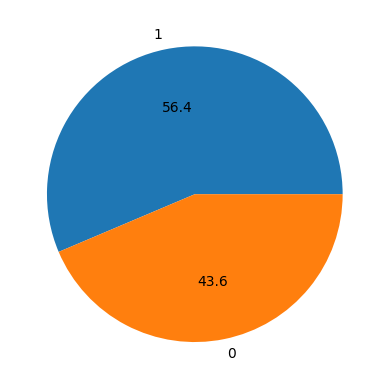

In [61]:
plt.pie(df['Classes'].value_counts(),labels=df['Classes'].value_counts().index,autopct='%1.1f')

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

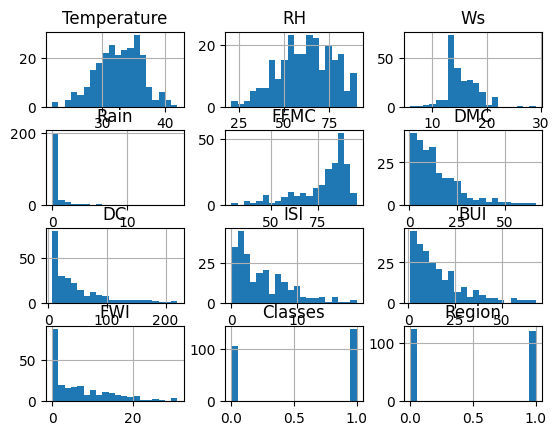

In [64]:
df.hist(bins=20)

<Axes: >

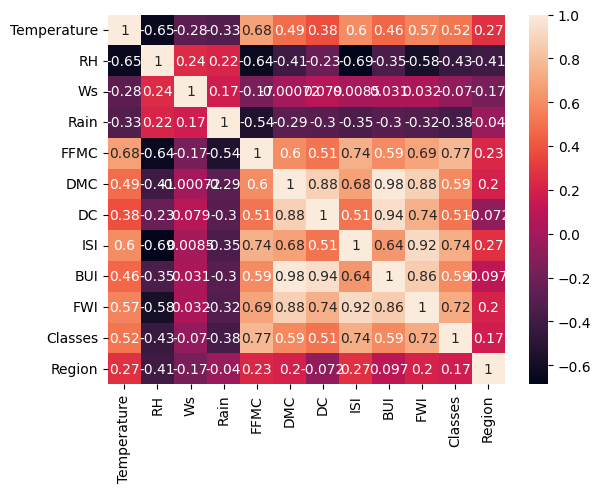

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
#split the data
from sklearn.model_selection import train_test_split

X=df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','Region','Classes']]
y=df['FWI']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
#multicolinearity
#feature selection

collinear_features=correlation(X_train,0.85)
collinear_features

{'BUI', 'DC'}

In [93]:
df['Region']=df['Region'].astype(int)

In [97]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,1,0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [100]:
#staandardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<Axes: >

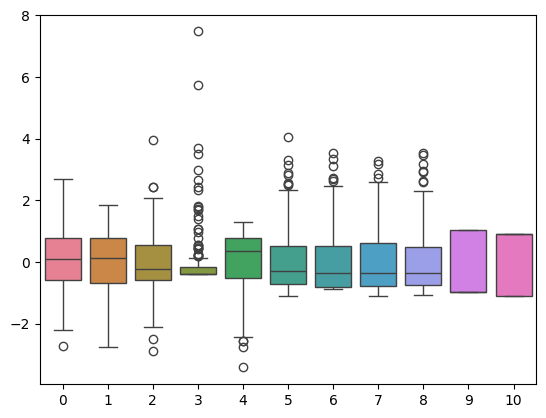

In [101]:
sns.boxplot(X_train)

In [103]:
from sklearn.linear_model import LinearRegression


model=LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)


[-6.42493732e-02 -1.79141151e-01 -6.72588069e-02  2.96251275e-03
 -8.75505558e-01  5.10340277e-02 -6.39939323e-01  5.03781305e+00
  4.21614899e+00 -1.80596474e-01  3.01707003e-01]
7.156043956043958


In [104]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9894102516764048

In [106]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.9548117077009715


In [109]:
from sklearn.linear_model import LassoCV

lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train,y_train)
print('Best alpha:',lasso_cv.alpha_)
y_pred=lasso_cv.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

Best alpha: 0.053395191056015395
R2 score: 0.987342775933791


In [108]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.9872039062287701


In [110]:
from sklearn.linear_model import RidgeCV

ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(X_train,y_train)
print('Best alpha:',ridge_cv.alpha_)
y_pred=ridge_cv.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

Best alpha: 1.0
R2 score: 0.9872039062287701


In [111]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [112]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.900671789556956


In [113]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('model.pkl','wb'))